## Chronic Disease Project: Predicting Heart Disease and Diabetes



Project Overview


**Project Purpose**
There are many codes/projects in Kaggle to predict heart disease or diabetes using CDC data. However, I was not able to find a project that predicts both heart disease and diabetes. Heart disease and diabetes are most common chronic diseases in the US. By accurately predicting the two disease, it will help people to acknowldege their health status and take preventive actions.
 Therefore, This project using the latest dataset aims to predict the two significant chronic diseases at the same time. On top of it, I will make an website where people can put their information to see the prediction.

**Project Focus**
There are two challenges in this project. First, the class are unbalanced and addressing the issue is critical to have a better performance. Second, the dataset has 39 variables except the target variable, which can be overwhelming for users to complete the questionaire.
1. Address class imbalance: oversampling or using model with class weight
2. Feature selections(less than 20 features)

Thus, there are three paths before selecting model.
- Path A: Oversampling all minority to the number of majority -> Feature selection
- Path B: Oversampling with the ratio(1:2) -> Feature selection -> Class weight-model
- Path C: Feature selection -> Class weight-model

Each path have pros and cons. Path A can preserve the original dataset but will be slower becasue of increased instances, while Path B and C can be faster. At the end, the f1 score and the running time will determine which path is best.

**Data Source**
The dataset is 2022 annual CDC survey data of 400k+ adults related to their health status. The dataset originally comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. The original dataset of nearly 300 variables was reduced to 40 variables by KAMIL PYTLAK. To see these preprocessing steps check out the preprocessing notebook.
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data

https://github.com/kamilpytlak/data-science-projects/blob/main/heart-disease-prediction/2022/notebooks/data_processing.ipynb

- The detail information of the dataset can be found at : https://www.cdc.gov/brfss/annual_data/annual_2022.html
- The detail description of the variables can be found at: https://www.cdc.gov/brfss/annual_data/2022/pdf/2022-calculated-variables-version4-508.pdf
LLCP 2022 Codebook Report

# Step1. Imports(Kaggle)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [3]:
df = pd.read_csv(r"/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv")

In [4]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
# Set a random seed
np.random.seed(42)

# Step 2. Data Exploration (Initial EDA and data cleaning)
- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [7]:
# Check distributions of numerical variables
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [8]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

#### *Initial Observations*

After reviewing the basic information about the data, several key thoughts and considerations have emerged:
- Target variable should be created from HadHeartAttack and HadDiabetes to predict both disease.
- Important factors for diabetes and heart disease both should be identified.(feature selection)
- Since it can be overwhelming to look at all the variables for EDA, EDA for each variables in detail can be conducted in the evaluation phase after feature selection.
- There is no variable to measure blood pressure and high cholesterol, which might be very useful since those are high risk factors of heart  recognized by CDC.


Variables can be dividted into several groups:
- **Chronic Disease:** 'HadHeartAttack', 'HadAngina','HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD','HadDepressiveDisorder','HadKidneyDisease', 'HadArthritis','HadDiabetes'
- **Demographics:**
'RaceEthnicityCategory'
'AgeCategory'
'State'
'Sex'
- **Personal Physical Information:**
'HeightInMeters'
'WeightInKilograms'
'BMI'
- **Personal Habits:**
'AlcoholDrinkers'
'SmokerStatus'
'ECigaretteUsage'
'SleepHours'
'PhysicalActivities'
- **Health Information:**
'GeneralHealth'
'PhysicalHealthDays'
'MentalHealthDays'
'DeafOrHardOfHearing'
'BlindOrVisionDifficulty'
'DifficultyConcentrating'
'DifficultyWalking'
'DifficultyDressingBathing'
'DifficultyErrands'
- **Medical Procedures and Vaccinations:**
'LastCheckupTime'
'RemovedTeeth'
'ChestScan'
'HIVTesting'
'FluVaxLast12'
'PneumoVaxEver'
'TetanusLast10Tdap'
'HighRiskLastYear'
'CovidPos'

* Note: 'HighRisk5' has original SAS Variable Name 'HIVRISK5' to ask if a person has a high risk of HIV/AIDS.


### Check missing values & duplicates

In [9]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [10]:
df.duplicated().sum()

9

In [11]:
df[df.duplicated(keep=False)].head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5294,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
5702,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
86986,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87371,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87555,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No


With several continuous variables across 40 columns, it seems very unlikely that these same observations are coincidence. I will proceed by dropping them.

In [12]:
df0 = df.drop_duplicates(keep='first')
df0.shape

(246013, 40)

### Check the distributions of chronic disease variables

In [13]:
df0['HadHeartAttack'].value_counts(normalize=True)

HadHeartAttack
No     0.945389
Yes    0.054611
Name: proportion, dtype: float64

In [14]:
df0['HadDiabetes'].value_counts(normalize=True)

HadDiabetes
No                                         0.832586
Yes                                        0.137436
No, pre-diabetes or borderline diabetes    0.021918
Yes, but only during pregnancy (female)    0.008061
Name: proportion, dtype: float64

Even though 'HadDiabetes' has 4 values, prediabetes and pregnancy will not be considered. Thus, 'Yes'and 'No' in four different answers will be taken as just 'Yes' and 'No.'

### Simplify Diabete Values

In [15]:
df0['HadDiabetes'] = df0['HadDiabetes'].apply(lambda x: 'Yes' if 'Yes' in x else 'No')
df0['HadDiabetes'].value_counts()

/tmp/ipykernel_43/1635230994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['HadDiabetes'] = df0['HadDiabetes'].apply(lambda x: 'Yes' if 'Yes' in x else 'No')


HadDiabetes
No     210219
Yes     35794
Name: count, dtype: int64

Heart disease and diabetes
- Clase 1: only Heart disease
- Clase 2: only Diabetes
- Clase 3: Heart disease & Diabetes
- Clase 4: None of them


### Create a target variable 'ChronicDisease'

In [16]:
df1 = df0.copy()

In [17]:
# Create a column 'ChronicDisease'
def create_chronic_disease(df, disease_heart, disease_diabetes):
    # Case 1: only Heart disease
    if (df[disease_heart] == 'Yes') & ('No' in df[disease_diabetes]):
        return 'Heart disease'
    # Case 2: Diabetes
    elif (df[disease_heart] == 'No') & ('Yes' in df[disease_diabetes]):
        return 'Diabetes'
    # Case 3: Both Heart disease and Diabetes
    elif (df[disease_heart] == 'Yes') & ('Yes' in df[disease_diabetes]):
        return 'Heart disease & Diabetes'
    # Case 4: No chronic disease
    else:
        return 'No'

# Applying the function to create the 'ChronicDisease' column
df1['ChronicDisease'] = df1.apply(lambda row: create_chronic_disease(row, 'HadHeartAttack', 'HadDiabetes'), axis=1)

df1[['HadHeartAttack', 'HadDiabetes', 'ChronicDisease']].head()

,HadHeartAttack,HadDiabetes,ChronicDisease
0,No,No,No
1,No,Yes,Diabetes
2,No,No,No
3,No,No,No
4,No,No,No


In [18]:
df1['ChronicDisease'].value_counts(normalize=True)

ChronicDisease
No                          0.819038
Diabetes                    0.126351
Heart disease               0.035466
Heart disease & Diabetes    0.019145
Name: proportion, dtype: float64

In [19]:
# Drop the original two target variables
df1.drop(columns=['HadHeartAttack', 'HadDiabetes'], inplace=True)

df1.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,ChronicDisease
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Diabetes
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No


### Drop columns

In order to simplify our analysis and reduce the dimensionality of the dataset, we have decided to keep only the 'BMI' feature and drop 'HeightInMeters' and 'WeightInKilograms'. This allows us to focus on a single metric that encapsulates both height and weight information.

In [20]:
# df1 = df1.drop(columns=['HeightInMeters', 'WeightInKilograms'])
# df1.columns

### Outliers and Scaling

In [21]:
# Divide columns to numerical and categorical features
num_columns = ['BMI', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays','HeightInMeters', 'WeightInKilograms']

cat_columns = list(set(df1.columns) - set(num_columns))
cat_columns.remove('ChronicDisease') #remove the target variable
target_column = ['ChronicDisease']
cat_columns
target_column
# cat_columns2 = df0.select_dtypes(exclude=['number']).columns

['ChronicDisease']

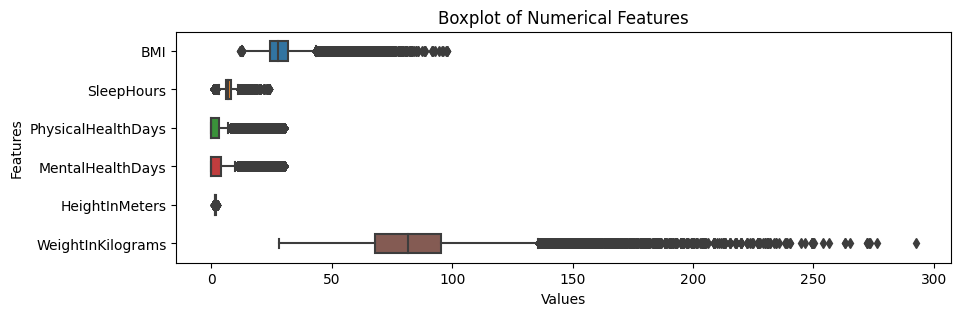

In [22]:
# Use the entire DataFrame for the 'data' parameter
plt.figure(figsize=(10, 3))
sns.boxplot(data=df1[num_columns], orient='h', width=.5)
plt.ylabel('Features')
plt.xlabel('Values')
plt.title('Boxplot of Numerical Features')
plt.show()

Most of numerical variables have many extreme outliers. These will be scaled later after spliting train and test dataset. However, outliers will remain untouched since it keeps original information.

# Step 3. Data Preprocessing

- Address any preprocessing steps needed for specific dataset, such as handling missing values, encoding categorical variables, and scaling numerical features.

### Encoding


- OrdinalEncoder() is for X, depedent variables. Without specifying the categories parameter in OrdinalEncoder, the behavior is similar to using LabelEncoder. Both methods assign integer labels based on the order in which unique values are encountered in the training data.
- LabelEncoder() is for Y, target variable.

Categorical Feature Support in Gradient Boosting
https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_categorical.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-categorical-py

I tried to do encoding all categorical variables including the target variable at a time before spliting X and y. However, it later throws warning in the step of mutual information because the dtype is float64 instead of discrete values such as integer. Thus, here the target variable will be converted separately using LabelEncoder().

**Note**: fit and fit_transform methods in LabelEncoder don't follow the standard scikit-lean convention for these methods: fit(X[, y]) and fit_transform(X[, y]). The fit and fit_transform method in the LabelEncoder only accepts one argument: fit(y) and fit_transform(y). Therefore, LabelEncoder couldn't be used inside a Pipeline or a ColumnTransform. Also the attempt of converting dtype of the target variable in the column transformer didn't work as the transformer changes whold dtype of dataframe.

In [23]:
# Make pipeline to encode categorical variables except the target variable
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

encoder = make_column_transformer(
    ( OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan,) #it converts to float64
     ,cat_columns ),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

df1_encoded = encoder.fit_transform(df1)

# [Option] Convert the result back to a DataFrame for better visualization
df1_encoded = pd.DataFrame(df1_encoded, columns=encoder.get_feature_names_out())
df1_encoded.head()

,HadSkinCancer,PneumoVaxEver,RemovedTeeth,CovidPos,GeneralHealth,DifficultyDressingBathing,AlcoholDrinkers,HadStroke,ECigaretteUsage,HIVTesting,...,DifficultyConcentrating,DeafOrHardOfHearing,HadCOPD,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,ChronicDisease
0,0.0,1.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,9.0,1.6,71.67,27.99,No
1,0.0,1.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.78,95.25,30.13,Diabetes
2,0.0,1.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,1.85,108.86,31.66,No
3,1.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,9.0,1.7,90.72,31.32,No
4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,15.0,5.0,1.55,79.38,33.07,No


In [24]:
# Encode Target Variable
y_encoder = LabelEncoder()
df1_encoded['ChronicDisease']  = y_encoder.fit_transform(df1_encoded['ChronicDisease'] )
df1_encoded.head()

,HadSkinCancer,PneumoVaxEver,RemovedTeeth,CovidPos,GeneralHealth,DifficultyDressingBathing,AlcoholDrinkers,HadStroke,ECigaretteUsage,HIVTesting,...,DifficultyConcentrating,DeafOrHardOfHearing,HadCOPD,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,ChronicDisease
0,0.0,1.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,9.0,1.6,71.67,27.99,3
1,0.0,1.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.78,95.25,30.13,0
2,0.0,1.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,1.85,108.86,31.66,3
3,1.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,9.0,1.7,90.72,31.32,3
4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,15.0,5.0,1.55,79.38,33.07,3


In [25]:
# Split to X and y
X = df1_encoded.drop('ChronicDisease',axis=1)
y = df1_encoded['ChronicDisease']

Class=0, n=31084 (12.635%)
Class=1, n=8725 (3.547%)
Class=2, n=4710 (1.915%)
Class=3, n=201494 (81.904%)


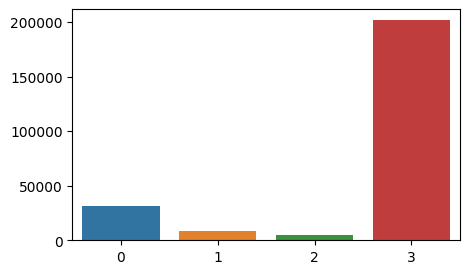

In [26]:
from collections import Counter

# summarize distribution
counter = Counter(y)
sorted_keys = sorted(Counter(y))

for key in sorted_keys:
    value = counter[key]
    per = value / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (key, value, per))

plt.figure(figsize=(5,3))
sns.barplot(x=list(counter.keys()), y=list(counter.values()))
plt.show()

There are many features and hard to look at every ones in EDA. Thus, let's select features first. However, the classes in the target variable are unbalanced, so resampling is needed. Therefore, first we will address class imbalance and do feature selection.


### Train/test split


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

# Split the temporary data into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True, stratify=y_temp, random_state=42)

print(f"Train Set: {len(X_train)} samples")
print(f"Validation Set: {len(X_val)} samples")
print(f"Test Set: {len(X_test)} samples")

Train Set: 196810 samples
Validation Set: 24601 samples
Test Set: 24602 samples


### Scaling

it's important to perform scaling after splitting dataset into training and testing sets. The reason for this is to avoid data leakage, which can occur when information from the test set is used to scale or preprocess the training set.

Here's the typical order of operations:

- Split the Data: Divide your dataset into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.
- Fit the Scaler on the Training Data: Apply your scaling method (e.g., RobustScaler, MinMaxScaler) to the training set only. This involves computing the mean, standard deviation, or other parameters based on the training data.
- Transform the Training Data: Transform the training set using the fitted scaler. This applies the scaling transformation based on the parameters learned from the training data.
- Fit and Transform the Test Data: Use the same scaler (fitted on the training set) to transform the test set. This ensures that the scaling is consistent across both sets.

**RobustScaler:**
Robust to outliers, as it uses the median and interquartile range (IQR) instead of the mean and standard deviation. Scales features based on the median and the IQR, making it less sensitive to extreme values.
Suitable when your dataset contains numerical features with outliers.

In [28]:
# Scale train and test data
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler instance
scaler = RobustScaler()

X_train_scaled, X_val_scaled, X_test_scaled = X_train.copy(), X_val.copy(), X_test.copy()

# Fit and transform the numerical features in the training set
X_train_scaled[num_columns] = scaler.fit_transform(X_train_scaled[num_columns])

# Transform the numerical features in the validation and test set using the same scaler
X_val_scaled[num_columns] = scaler.transform(X_val_scaled[num_columns])
X_test_scaled[num_columns] = scaler.transform(X_test_scaled[num_columns])

In [29]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196810 entries, 68749 to 102461
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   HadSkinCancer              196810 non-null  object 
 1   PneumoVaxEver              196810 non-null  object 
 2   RemovedTeeth               196810 non-null  object 
 3   CovidPos                   196810 non-null  object 
 4   GeneralHealth              196810 non-null  object 
 5   DifficultyDressingBathing  196810 non-null  object 
 6   AlcoholDrinkers            196810 non-null  object 
 7   HadStroke                  196810 non-null  object 
 8   ECigaretteUsage            196810 non-null  object 
 9   HIVTesting                 196810 non-null  object 
 10  FluVaxLast12               196810 non-null  object 
 11  HadAsthma                  196810 non-null  object 
 12  HadDepressiveDisorder      196810 non-null  object 
 13  TetanusLast10Tdap          196

# Step 4. Baseline Model
- Start with a baseline model without any feature selection or resampling. Train a simple model on the dataset to establish a baseline performance. This could be a default model without tuning.

For feature selection techniques like Recursive Feature Elimination (RFE), Mutual Information, and SelectFromModel, it's often a good idea to use models that inherently provide feature importance scores. Random Forest is known for its ability to provide feature importance scores and it's robust and handles non-linearity well.  

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Randome Forest
rf = RandomForestClassifier(random_state = 42)

rf_accuracy = cross_val_score(rf, X_train_scaled, y_train,  cv=3, scoring ='accuracy')
rf_f1 = cross_val_score(rf, X_train_scaled, y_train,  cv=3, scoring ='f1_macro')

print(f'rf_accuracy: {round(rf_accuracy.mean(), 3)}  |  rf_f1_macro: {round(rf_f1.mean(), 3)}\n')
# rf_accuracy: 0.8223902351212771  |  rf_f1_macro: 0.34040653571140167

rf_accuracy: 0.822  |  rf_f1_macro: 0.337



In [31]:
# from sklearn.metrics import get_scorer_names

# # Get the list of available scorer names
# get_scorer_names()

The f1 macro score from the baseline model is very low(0.34) and it doesn't predict well. Let's see how it changes after resampling and feature selection.


***Note: What type of f1 score shoud I use?***
When dealing with multiclass classification, you need to adjust the 'average' parameter for scoring to a suitable value. In this case, you can choose one of the following options for 'average':

- 'micro': Calculate metrics globally by considering all instances together as a single label.
- 'macro': Calculate metrics for each label and average them unweighted.
- 'weighted': Calculate metrics for each label and average them, weighted by the number of true instances for each label. When using 'weighted' in classification metrics, it means that the metric considers the imbalance in class sizes, giving more weight to classes with more instances.

In the context of imbalanced multiclass classification where predicting minority classes is important, using the macro-averaged metrics can be more appropriate than the weighted metrics. In the context of imbalanced multiclass classification where predicting minority classes is important, using the macro-averaged metrics can be more appropriate than the weighted metrics.

Reference: https://scikit-learn.org/stable/modules/model_evaluation.html

# Step 5. Imbalanced Class Handling

**Resampling methods:**

For multiclass imbalanced targets, the choice of the specific SMOTE variant may depend on the distribution of classes and the complexity of the relationships between them. It's often a good idea to experiment with multiple variants and evaluate their performance using cross-validation or other appropriate metrics.

- Borderline-SMOTE: This variant focuses on generating synthetic samples on the borderline between the majority and minority classes. It is designed to address issues where the minority class samples are close to the majority class samples.
- ADASYN (Adaptive Synthetic Sampling): ADASYN is an adaptive variant of SMOTE that generates more synthetic samples for the minority class instances that are harder to learn.
- SMOTETomek: SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links.

**Oversampling all minority vs. Oversampling with ratio:**

If the class imbalance is extreme, oversampling might be more beneficial as it directly introduces more instances of the minority class. Commonly used resampling ratios include 1:1 (balanced), where you have an equal number of instances for each class, and various ratios for imbalanced datasets, such as 2:1 or 3:1. In cases where the dataset is already large, and oversampling might lead to computational challenges, using class weights could be a more practical choice. It's not uncommon to use a combination of oversampling and class weights. For example, you might oversample to a certain extent and then use class weights to further fine-tune the model. In this project, I will experiment both ways: oversampling all minority, or combination of oversamping ratios and class weights. Then compare the opportunity cost.

Reference:
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

***Note: why should I resample after spliting train and test dataset?***
The SMOTE and its related techniques are only applied to the training dataset so that we fit our algorithm properly on the data. The test data remains unchanged so that it correctly represents the original data, imbalanced class.
So before SMOTE, split X, y into train and test, and then resample only X.

***Note: why should I resample before feature selection?***
In an imbalanced dataset, during the training process, models tend to prioritize learning patterns that lead to accurate predictions for the majority class, often at the expense of minority class information. In an imbalanced dataset, features associated with the majority class may dominate the selection process. This is because the model might achieve high accuracy by relying on these features, even if it means neglecting information crucial for minority class predictions.

In [32]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_score
from collections import Counter

In [33]:
Counter(y_train)

Counter({3: 161195, 0: 24867, 1: 6980, 2: 3768})

In [34]:
# Make function to count classes in y
def class_counter(y):
    counter = Counter(y)
    sorted_keys = sorted(Counter(y))

    class_counter_list = []
    for key in sorted_keys:
        value = counter[key]
        per = value / len(y) * 100
        class_counter_list.append('Class=%d, n=%d (%.3f%%)' % (key, value, per))

    return class_counter_list

In [35]:
# Original y_train class distribution
class_counter(y_train)

['Class=0, n=24867 (12.635%)',
 'Class=1, n=6980 (3.547%)',
 'Class=2, n=3768 (1.915%)',
 'Class=3, n=161195 (81.904%)']

Class 0 ~ 2 is equally important but oversampling to majority class will be too many instances. So in case of oversamping all minority to the number of majority class, it can be oversampled to the half of the majority class.

In [36]:
# Specify the desired ratio based on the original class distribution
class_distribution = Counter(y_train)
desired_ratio = {key: class_distribution[key] for key in class_distribution}
desired_ratio[0.0] = int(desired_ratio[3.0]/2)  # oversample class 0 to half of class 3
desired_ratio[1.0] = int(desired_ratio[3.0]/2)  # oversample class 0 to half of class 3
desired_ratio[2.0] = int(desired_ratio[3.0]/2)  # oversample class 0 to half of class 3

desired_ratio

{1: 80597, 3: 161195, 2: 80597, 0: 80597}

In [37]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

### Method 1. BorderlineSMOTE

#### Path A. Oversampling all

Cross_Val_Score from Training Set

In [38]:
"""## BorderlineSMOTE for all minority

# Apply BorderlineSMOTE to the training data
BLsmote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

X_train_BLsmote_a, y_train_BLsmote_a = BLsmote.fit_resample(X_train_scaled, y_train)
print('Class proportion: ', class_counter(y_train_BLsmote_a))

# Train your classifier on the oversampled data
BLsmote_accuracy = cross_val_score(rf, X_train_BLsmote_a, y_train_BLsmote_a,  cv=3, scoring ='accuracy')
BLsmote_f1 = cross_val_score(rf, X_train_BLsmote_a, y_train_BLsmote_a,  cv=3, scoring ='f1_macro')

print(f'rf_accuracy: {round(BLsmote_accuracy.mean(), 3)}  |  rf_f1_macro: {round(BLsmote_f1.mean(), 3)}\n')"""

"## BorderlineSMOTE for all minority\n\n# Apply BorderlineSMOTE to the training data\nBLsmote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)\n\nX_train_BLsmote_a, y_train_BLsmote_a = BLsmote.fit_resample(X_train_scaled, y_train)\nprint('Class proportion: ', class_counter(y_train_BLsmote_a))\n\n# Train your classifier on the oversampled data\nBLsmote_accuracy = cross_val_score(rf, X_train_BLsmote_a, y_train_BLsmote_a,  cv=3, scoring ='accuracy')\nBLsmote_f1 = cross_val_score(rf, X_train_BLsmote_a, y_train_BLsmote_a,  cv=3, scoring ='f1_macro')\n\nprint(f'rf_accuracy: {round(BLsmote_accuracy.mean(), 3)}  |  rf_f1_macro: {round(BLsmote_f1.mean(), 3)}\n')"

Score from Validation Set

In [39]:
"""# Apply BorderlineSMOTE to the training data
BLsmote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

X_train_BLsmote_a, y_train_BLsmote_a = BLsmote.fit_resample(X_train_scaled, y_train)
print('Class proportion: ', class_counter(y_train_BLsmote_a))

rf.fit(X_train_BLsmote_a, y_train_BLsmote_a)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))"""

"# Apply BorderlineSMOTE to the training data\nBLsmote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)\n\nX_train_BLsmote_a, y_train_BLsmote_a = BLsmote.fit_resample(X_train_scaled, y_train)\nprint('Class proportion: ', class_counter(y_train_BLsmote_a))\n\nrf.fit(X_train_BLsmote_a, y_train_BLsmote_a)\ny_val_pred = rf.predict(X_val)\n\nprint(classification_report(y_val, y_val_pred))"

cross_val_score and score from validation set are very different. The model is overfitting so much that it doesn't capture the real prediction performance. Therefore, a separate validation set will be used instead of cross_val_score.

#### Path B. Oversampling ratios

In [40]:
"""# Apply BorderlineSMOTE to the training data
BLsmote = BorderlineSMOTE(sampling_strategy=desired_ratio, random_state=42)

X_train_BLsmote_b, y_train_BLsmote_b = BLsmote.fit_resample(X_train_scaled, y_train)
print('Class proportion: ', class_counter(y_train_BLsmote_b))

rf.fit(X_train_BLsmote_b, y_train_BLsmote_b)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))"""

"# Apply BorderlineSMOTE to the training data\nBLsmote = BorderlineSMOTE(sampling_strategy=desired_ratio, random_state=42)\n\nX_train_BLsmote_b, y_train_BLsmote_b = BLsmote.fit_resample(X_train_scaled, y_train)\nprint('Class proportion: ', class_counter(y_train_BLsmote_b))\n\nrf.fit(X_train_BLsmote_b, y_train_BLsmote_b)\ny_val_pred = rf.predict(X_val)\n\nprint(classification_report(y_val, y_val_pred))"

### Method 2. ADASYN

In [41]:
adsmote = ADASYN(sampling_strategy='auto', random_state=42)
# adsmote = ADASYN(sampling_strategy=desired_ratio, random_state=42)

X_train_adsmote_a, y_train_adsmote_a = adsmote.fit_resample(X_train_scaled, y_train)
print(class_counter(y_train_adsmote_a))

rf.fit(X_train_adsmote_a, y_train_adsmote_a)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

['Class=0, n=165493 (25.407%)', 'Class=1, n=161784 (24.838%)', 'Class=2, n=162897 (25.008%)', 'Class=3, n=161195 (24.747%)']
              precision    recall  f1-score   support

           0       0.33      0.24      0.28      3108
           1       0.34      0.22      0.27       873
           2       0.24      0.14      0.18       471
           3       0.87      0.93      0.90     20149

    accuracy                           0.80     24601
   macro avg       0.44      0.38      0.40     24601
weighted avg       0.77      0.80      0.78     24601



In [42]:

adsmote = ADASYN(sampling_strategy=desired_ratio, random_state=42)

X_train_adsmote_b, y_train_adsmote_b = adsmote.fit_resample(X_train_scaled, y_train)
print(class_counter(y_train_adsmote_b))

rf.fit(X_train_adsmote_b, y_train_adsmote_b)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

['Class=0, n=81421 (20.237%)', 'Class=1, n=78649 (19.548%)', 'Class=2, n=81074 (20.151%)', 'Class=3, n=161195 (40.064%)']
              precision    recall  f1-score   support

           0       0.31      0.23      0.26      3108
           1       0.34      0.19      0.24       873
           2       0.26      0.17      0.20       471
           3       0.87      0.92      0.89     20149

    accuracy                           0.80     24601
   macro avg       0.44      0.38      0.40     24601
weighted avg       0.76      0.80      0.78     24601



### Method 3. SMOTETomek

In [43]:
"""TMsmote = SMOTETomek(sampling_strategy='auto', random_state=42)
# TMsmote = SMOTETomek(sampling_strategy=desired_ratio, random_state=42)

X_train_TMsmote, y_train_TMsmote = TMsmote.fit_resample(X_train_scaled, y_train)
print(class_counter(y_train_TMsmote))

rf.fit(X_train_TMsmote, y_train_TMsmote)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))"""

"TMsmote = SMOTETomek(sampling_strategy='auto', random_state=42)\n# TMsmote = SMOTETomek(sampling_strategy=desired_ratio, random_state=42)\n\nX_train_TMsmote, y_train_TMsmote = TMsmote.fit_resample(X_train_scaled, y_train)\nprint(class_counter(y_train_TMsmote))\n\nrf.fit(X_train_TMsmote, y_train_TMsmote)\ny_val_pred = rf.predict(X_val)\n\nprint(classification_report(y_val, y_val_pred))"

In [44]:
"""TMsmote = SMOTETomek(sampling_strategy=desired_ratio, random_state=42)

X_train_TMsmote, y_train_TMsmote = TMsmote.fit_resample(X_train_scaled, y_train)
print(class_counter(y_train_TMsmote))

rf.fit(X_train_TMsmote, y_train_TMsmote)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))"""

'TMsmote = SMOTETomek(sampling_strategy=desired_ratio, random_state=42)\n\nX_train_TMsmote, y_train_TMsmote = TMsmote.fit_resample(X_train_scaled, y_train)\nprint(class_counter(y_train_TMsmote))\n\nrf.fit(X_train_TMsmote, y_train_TMsmote)\ny_val_pred = rf.predict(X_val)\n\nprint(classification_report(y_val, y_val_pred))'

### ***Summary***

BorderlineSMOTE
- Oversampling all (1:1:1:1): Accuracy: 0.79/ f1_macro: 0.39
- Oversampling ratios (1:1:1:2): Accuracy: 0.80/ f1_macro: 0.39

ADASYN
- Oversampling all (1:1:1:1): Accuracy: 0.80/ f1_macro: 0.40
- Oversampling ratios (1:1:1:2): Accuracy: 0.79/ f1_macro: 0.39

SMOTETomek
- Oversampling all (1:1:1:1): Accuracy: 0.80/ f1_macro: 0.40
- Oversampling ratios (1:1:1:2): Accuracy: 0.81/ f1_macro: 0.36

The performance after resampling is better than the one with imbalanced classes(f1_macro: 0.33). The score is higher when oversampling minority classes to the number of the majority class. However, since it has computational cost, the ratio 1:1:1:2 can be used and then class-weight be applied for the model. Among SMOTE variants, ADASYN has the highest score for both cases of oversampling all and oversampling with ratio.

In [45]:
X_train_re_a, y_train_re_a = X_train_adsmote_a.copy(), y_train_adsmote_a.copy()
X_train_re_b, y_train_re_b = X_train_adsmote_b.copy(), y_train_adsmote_b.copy()

# Step 6. Feature Selection

At the end of this project, I will make an app to predict the disease and if there are 39 questions, users are highly likely to feel overwhelmed and quit before completing the questionaire. So I have to find a balance where the performance is good enough with the least number of questions.

Experiment with different feature selection methods. You can try univariate methods (e.g., SelectKBest), recursive methods (e.g., Recursive Feature Elimination), or model-based methods (e.g., feature importance from tree-based models). Evaluate the performance of the model with selected features.

### Method 1. Mutual Information

In [45]:
X_train_resample_cols = X_train_re_a.columns
bool_discrete_cols = X_train_resample_cols.map(lambda col: col in cat_columns)
bool_discrete_cols

Index([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False],
      dtype='bool')

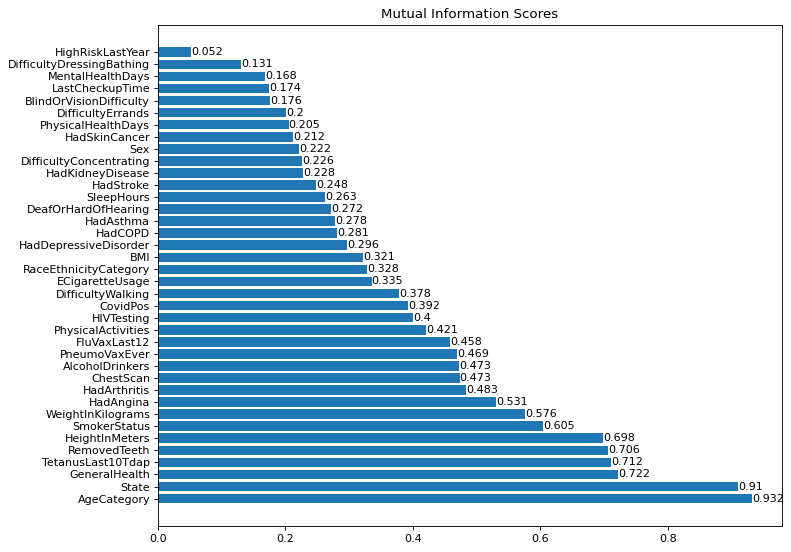

In [46]:
# Make the mutual information scores for each feature
from sklearn.feature_selection import mutual_info_classif
import warnings

# Suppress UserWarnings globally
warnings.filterwarnings("ignore", category=UserWarning)

# mi_scores
mi_scores_a = mutual_info_classif(X_train_re_a, y_train_re_a, discrete_features=bool_discrete_cols, random_state=42)
mi_scores_a = pd.Series(mi_scores_a, name='MI Scores', index=X_train_re_a.columns).sort_values(ascending=False)

# Plot
plt.figure(dpi=80, figsize=(10, 7))
width = np.arange(len(mi_scores_a))
ticks = list(mi_scores_a.index)
plt.barh(width, mi_scores_a)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")
for i, score in enumerate(mi_scores_a):
    plt.text(y=i, x=score+0.0002, s=str(round(score, 3)), va='center')

plt.tight_layout()
plt.show()

In [47]:
mi_scores_a[:5]

AgeCategory          0.931993
State                0.909786
GeneralHealth        0.722258
TetanusLast10Tdap    0.711643
RemovedTeeth         0.705965
Name: MI Scores, dtype: float64

Interestingly enough, the feature selections before and after the resampling(class imbalance) are different as below. The plot below shows the feature selections before the resampling.(In an imbalanced dataset, features associated with the majority class may dominate the selection process.)

![Pasted Graphic 37.png](attachment:b476264d-c077-4195-9469-bc29b909e0fd.png)

Note: 'HadAngina': Ever Diagnosed with Angina or Coronary Heart Disease

In [48]:
"""%%time
# check how many K best featuers are needed
KBEST_f1_scores = []

for k in range(10, len(X_train_resample_a.columns) +1):
    k_features = mi_scores_a[:k].index

    # Get f1 score from the model
    f1_scores = cross_val_score(rf, X_train_resample_a[k_features], y_train_resample_a, scoring='f1_macro', cv=3)
    mean_f1_score = f1_scores.mean()
    print(mean_f1_score)
    KBEST_f1_scores.append(mean_f1_score)"""

"%%time\n# check how many K best featuers are needed\nKBEST_f1_scores = []\n\nfor k in range(10, len(X_train_resample_a.columns) +1):\n    k_features = mi_scores_a[:k].index\n\n    # Get f1 score from the model\n    f1_scores = cross_val_score(rf, X_train_resample_a[k_features], y_train_resample_a, scoring='f1_macro', cv=3)\n    mean_f1_score = f1_scores.mean()\n    print(mean_f1_score)\n    KBEST_f1_scores.append(mean_f1_score)"

0.9058298932330834
0.9083541456836559
0.9109039012459149
0.9137694445738163
0.9149170575764108
0.9176839584880465
0.9182531352456831
0.9193389839078772
0.9207290643599749
0.9214172625002605
0.9224760442587524
0.9227347766992174
0.9236085868758132
0.925515095638799
0.9261560585536994
0.9261824610650957
0.9264122230675947
0.9263974580470181
0.9272102697211647
0.9277418458177286
0.9283046617971277
0.9281699202794066
0.9286303077325586
0.9295824214591989
0.9300966101326785
0.9306014884497191
0.9302753694813003
0.9302475891117318
0.9301164292586522
CPU times: user 3h 53min 39s, sys: 18.4 s, total: 3h 53min 57s
Wall time: 3h 54min

In [49]:
"""best_KBEST_f1_score = max(KBEST_f1_scores)
best_KBEST_num_features = KBEST_f1_scores.index(best_KBEST_f1_score) +11

# Print the result
print(f"Best F1 score ({best_KBEST_f1_score}) obtained with {best_KBEST_num_features} features.")"""

'best_KBEST_f1_score = max(KBEST_f1_scores)\nbest_KBEST_num_features = KBEST_f1_scores.index(best_KBEST_f1_score) +11\n\n# Print the result\nprint(f"Best F1 score ({best_KBEST_f1_score}) obtained with {best_KBEST_num_features} features.")'

Best F1 score (0.9306014884497191) obtained with 36 features.

In [50]:
"""# Create a Seaborn bar plot
n_cols = len(KBEST_f1_scores)

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=np.arange(10, n_cols+10), y=KBEST_f1_scores, palette="Blues", width=0.5, )
ax.set(xlabel='Number of features selected using mutual information',
       ylabel='F1_Macro',
       ylim=(0, 1.0),
       xticklabels= np.arange(10, n_cols+10))

# Annotate the bars with the F1 scores
for i, score in enumerate(KBEST_f1_scores):
    ax.text(x=i, y=score + 0.05, s=str(round(score,3)), ha='center')

plt.tight_layout()
plt.show()"""

'# Create a Seaborn bar plot\nn_cols = len(KBEST_f1_scores)\n\nplt.figure(figsize=(14, 6))\nax = sns.barplot(x=np.arange(10, n_cols+10), y=KBEST_f1_scores, palette="Blues", width=0.5, )\nax.set(xlabel=\'Number of features selected using mutual information\',\n       ylabel=\'F1_Macro\',\n       ylim=(0, 1.0),\n       xticklabels= np.arange(10, n_cols+10))\n\n# Annotate the bars with the F1 scores\nfor i, score in enumerate(KBEST_f1_scores):\n    ax.text(x=i, y=score + 0.05, s=str(round(score,3)), ha=\'center\')\n\nplt.tight_layout()\nplt.show()'

![Pasted Graphic 2.png](attachment:3430ea74-0856-4c77-8736-9a63a490fbb4.png)

=> As the number of features increases. the f1 score goes up a very tiny fraction. With 10 features, the score is 0.83 and with 20 features, 0.85. At this point. It is hard to discern how many features should be selected with this method. I need to use a different approach of feature selection.

### Method 2. Embedded Methods

Unlike wrapper methods, you do not need to explicitly give an argument for the size of features set in this approach. The features are removed, if their coefficients or feature importance values are below a threshold value which is calculated by using various heuristics like mean or median.

#### Case A. X_train with oversampling all

In [263]:
%%time
from sklearn.feature_selection import SelectFromModel

# Use RFE for feature selection
sfm = SelectFromModel(estimator=rf)
SFM_selector = sfm.fit(X_train_re_a, y_train_re_a)
SFM_feature_mask_a = SFM_selector.get_support()
print(SFM_feature_mask_a)
X_train_refe_a = X_train_re_a.iloc[:, SFM_feature_mask_a]

# Adjust the validation data
X_val_fe_a = X_val.iloc[:, SFM_feature_mask_a]

rf.fit(X_train_refe_a, y_train_re_a)
y_val_pred = rf.predict(X_val_fe_a)

f1_score_val = f1_score(y_val, y_val_pred, average='macro')
print('accuracy score: ', accuracy_score(y_val, y_val_pred))
# Print the result
print(f"F1 score ({f1_score_val:.3f}) obtained with {len(X_train_refe_a.columns)} features which are {X_train_refe_a.columns}.")

[False  True  True False False False  True False  True False False  True
 False False  True False  True False False  True False  True  True  True
  True False False  True False False False False False False  True  True
  True  True]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/magics/execution.py", line 1325, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 13, in <module>
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 473, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 63, in __call__
    for delayed_func, args, kwargs in iterable
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 123, in __call__
    UserWarning,
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 184, in _parallel_build_tre

#### Case B. X_train with oversampling ratios

In [264]:
%%time
from sklearn.feature_selection import SelectFromModel

# Use RFE for feature selection
sfm = SelectFromModel(estimator=rf)
SFM_selector = sfm.fit(X_train_re_b, y_train_re_b)
SFM_feature_mask_b = SFM_selector.get_support()
X_train_refe_b = X_train_re_b.iloc[:, SFM_feature_mask_b]

# Adjust the validation data
X_val_fe_b = X_val.iloc[:, SFM_feature_mask_b]
rf.fit(X_train_refe_b, y_train_re_b)
y_val_pred = rf.predict(X_val_fe_b)

f1_score_val = f1_score(y_val, y_val_pred, average='macro')
print('accuracy score: ', accuracy_score(y_val, y_val_pred))
# Print the result
print(f"F1 score ({f1_score_val:.3f}) obtained with {len(X_train_refe_b.columns)} features which are {X_train_refe_b.columns}.")

accuracy score:  0.765822527539531
F1 score (0.354) obtained with 17 features which are Index(['Sex', 'HadAngina', 'State', 'AgeCategory', 'HadArthritis',
       'FluVaxLast12', 'SmokerStatus', 'PneumoVaxEver', 'RemovedTeeth',
       'GeneralHealth', 'ChestScan', 'AlcoholDrinkers', 'DifficultyWalking',
       'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object').
CPU times: user 5min 45s, sys: 448 ms, total: 5min 45s
Wall time: 5min 46s


['WeightInKilograms', 'PneumoVaxEver', 'HadArthritis', 'AgeCategory',
       'AlcoholDrinkers', 'HeightInMeters', 'SmokerStatus', 'GeneralHealth',
       'RemovedTeeth', 'State', 'ChestScan', 'HadAngina', 'DifficultyWalking',
       'SleepHours', 'BMI']

#### ***Summary***
In the case of oversampling all, 15 features are selected with f1 score of 0.392. For oversampling ratios, 15 features are selected with f1 score of 0.389. 
The top five features from Mutual Information are 'AgeCategory', 'State',  and 'GeneralHealth'. The features that are not selected by SFM method are 'BMI' and 'SleepHours'.

In [ ]:
mi_scores_a[:3]

In [ ]:
# Compare feature selection from Mutual information and SFM method 
features_SFM = set(X_train_refe_a.columns) 
features_MI = set(mi_scores_a[:15].index)

# Find the difference
diff_features = features_SFM.difference(features_MI)
diff_features

In [265]:
X_train_A, y_train_A = X_train_refe_a.copy(), y_train_re_a.copy()
X_val_A = X_val_fe_a.copy()


In [266]:
X_train_B, y_train_B = X_train_refe_b.copy(), y_train_re_b.copy()
X_val_B = X_val_fe_b.copy()

# Step 6. Model Building

- Some models support the class_weight parameter for handling imbalanced datasets in multiclass classification.

### Compare Path A, B, C

#### Path A. X_train with oversampling all and feature selection

In [ ]:
%%time
## Randome Forest
rf = RandomForestClassifier(random_state = 32)

rf.fit(X_train_A, y_train_A)
y_val_pred = rf.predict(X_val_A)

print(classification_report(y_val, y_val_pred))

#### Path B. X_train with oversampling ratios, feature selection and class weights

In [ ]:
%%time
## Randome Forest
rf = RandomForestClassifier(random_state = 32, class_weight = 'balanced')

rf.fit(X_train_B, y_train_B)
y_val_pred = rf.predict(X_val_B)

print(classification_report(y_val, y_val_pred))

#### Path C. X_train with class weights(no feature selection)

In [ ]:
%%time
## Randome Forest
rf = RandomForestClassifier(random_state = 32, class_weight = 'balanced')

rf.fit(X_train_scaled, y_train)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

#### Summary
Baseline model:
- F1 score : 0.33

**Path A: oversampling all mininority and feature selection**
- F1 score after oversampling all: **0.40**
- F1 score after feature selection(15 features): **0.40(Accuracy: 0.794)**

**Path B: oversampling ratios, feature selection, and class weight**
- F1 score after oversampling with ratio: **0.39**
- F1 score after feature selection(15 features): **0.37(0.796)**
- F1 score with class weight: **0.36(Accuracy: 0.81)**

**Path C: class weight(38 features)**
- F1 score with class weight: **0.28**


Path A and B have similar performance, although duration to proceed the model and the number of steps are different. Path A is considered as optimal choice even though it has lower accuracy score because it has higher score than Path B to predict class 0 to 2 which are to have chronic diseases.  


### Model Comparison

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train_A, y_train_A)
y_val_pred = knn.predict(X_val_A)

print(classification_report(y_val, y_val_pred))

In [ ]:
# Check the dtypes because categorical columns was set as 'object' and ensample tree models can't process that.
# X_train_A.info()

In [ ]:
# Convert 'object' type to 'int'
cat_columns = X_train_A.select_dtypes(include='object').columns.tolist()
cat_columns
X_train_A[cat_columns] = X_train_A[cat_columns].astype(int)
X_train_A.info()

In [ ]:
# X_val_A.info()

In [ ]:
X_val_A[cat_columns] = X_val_A[cat_columns].astype(int)
num_columns = ['SleepHours','HeightInMeters','WeightInKilograms','BMI']
X_val_A[num_columns] = X_val_A[num_columns].astype(float)
X_val_A.info()

In [ ]:
# XGB Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=32)
xgb.fit(X_train_A, y_train_A)
y_val_pred = xgb.predict(X_val_A)

print(classification_report(y_val, y_val_pred))

**HistGradientBoostingClassifier** is often preferred for large datasets due to its improved memory efficiency and faster training speed. For small to medium-sized datasets, the traditional GradientBoostingClassifier may still be a suitable choice.

Also, HistGradientBoostingClassifier has Categorical Feature Support which will be used here.
(https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_categorical.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-categorical-py)

In [ ]:
# Hist Gradient Boosting Classifier
hgbc = HistGradientBoostingClassifier(random_state=42, categorical_features=cat_columns)
hgbc.fit(X_train_A, y_train_A)
y_val_pred = hgbc.predict(X_val_A)

print(classification_report(y_val, y_val_pred))

Model Comparison with oversampling all and feature selection

- **rf_f1_avg: 0.36(Accuracy: 0.77)**
- kn_f1_avg: 0.23(Accuracy: 0.78)
- xgb_f1_avg: 0.36(Accuracy: 0.64)
- hgbc_f1_avg: 0.37(Accuracy: 0.63)

Random forest has overall best performance considering accuracy and f1 score at a time.

### Model Tuned Performance
After getting the baselines, let's see if we can improve on the indivdual model results! I mainly used grid search to tune the models. I also used Randomized Search for the Random Forest to simplify testing time.

|Model|Baseline|Tuned Performance|
|-----|--------|-----------------|
|Random Forest| 36.0%| ? |

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Simple performance report
def search_result(model_searched, model_name):
    print(model_name,':')
    print('Best f1 score: '+ str(model_searched.best_score_))
    print('Best parameters: '+ str(model_searched.best_params_))

In [ ]:
"""%%time
# Randomized Search CV

rf = RandomForestClassifier(random_state = 42)
param_dist = {'n_estimators': [100,500],
                                  'bootstrap': [True,False],
                                  'max_features': ['sqrt', 'log2'],
                                  'max_depth': [5,10,20],
                                  'min_samples_leaf': [2,5,10],
                                  'min_samples_split': [2,5,10]
             }

random_rf = GridSearchCV(rf, param_dist, cv = 3, scoring='f1_macro', refit=True)
print('half done')
best_random_rf = random_rf.fit(X_train_SFM_a, y_train_BLsmote_a)
search_result(best_random_rf, 'Random Forest Random Search')"""

In [ ]:
"""%%time
# Grid Search CV
rf = RandomForestClassifier(random_state = 42)
param_dist = {'n_estimators': [100,500,1000],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}

random_rf = GridSearchCV(rf, param_dist, cv = 3, scoring='f1_macro', refit=True)
random_rf.fit(X_train_SFM_a, y_train_BLsmote_a)
"""

After several search for the best parameters, it was found out that the more limits are set on parameters such as max_depth or min_samples_split, the performance decreases. In the case of n_estimators, the performance gets a tiny bit better as the number goes up. However, the increasing amount is too small to be considered as worth. Therefore, the model will remain untouched.

ex.
max_depth=5  ==> rf_f1_macro: 0.64


# Step 7. Results and Evaluation


In [ ]:
# Apply feature selection to test dataset
X_test_final = X_test_scaled.iloc[:, SFM_feature_mask_a]
y_test_final = y_test.copy()

In [267]:
X_test_final_b = X_test_scaled.iloc[:, SFM_feature_mask_b]
y_test_final_b = y_test.copy()

In [52]:
# Predict test data
rf_final = RandomForestClassifier(random_state=42, n_estimators=100)
rf_final.fit(X_train_A, y_train_A)
y_pred = rf_final.predict(X_test_final)

print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.11      0.17      3109
           1       0.31      0.21      0.25       872
           2       0.30      0.21      0.25       471
           3       0.85      0.96      0.90     20150

    accuracy                           0.81     24602
   macro avg       0.46      0.37      0.39     24602
weighted avg       0.76      0.81      0.78     24602



In [151]:
# Predict test data
rf_final_b = RandomForestClassifier(random_state=42, n_estimators=20, class_weight = 'balanced')
rf_final_b.fit(X_train_B, y_train_B)
y_pred_b = rf_final_b.predict(X_test_final_b)

print(classification_report(y_test_final_b, y_pred_b))

              precision    recall  f1-score   support

           0       0.35      0.14      0.20      3109
           1       0.30      0.21      0.24       872
           2       0.28      0.21      0.24       471
           3       0.86      0.95      0.90     20150

    accuracy                           0.81     24602
   macro avg       0.45      0.38      0.40     24602
weighted avg       0.76      0.81      0.78     24602



To minimize the size of pickle file, the model parameter should be adjusted.

In [268]:
# Predict test data
rf_final_b = RandomForestClassifier(random_state=42, n_estimators=14, class_weight = 'balanced', max_depth=10)
rf_final_b.fit(X_train_B, y_train_B)
y_pred_b = rf_final_b.predict(X_test_final_b)

print(classification_report(y_test_final_b, y_pred_b))

              precision    recall  f1-score   support

           0       0.33      0.36      0.34      3109
           1       0.29      0.31      0.30       872
           2       0.28      0.39      0.33       471
           3       0.89      0.87      0.88     20150

    accuracy                           0.78     24602
   macro avg       0.45      0.48      0.46     24602
weighted avg       0.79      0.78      0.78     24602



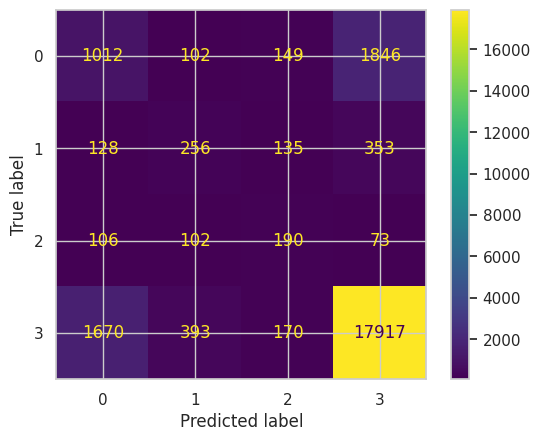

In [176]:
# Create Confusion Matrix
cm = confusion_matrix(y_test_final_b, y_pred_b, labels=rf_final_b.classes_)

# Create display of confusion matrix
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=rf_final_b.classes_)
# Plot confusion matrix
# plt.figure(figsize=(2,2))
cm_disp.plot(values_format='')
plt.show()

#### *Summary*

The overall test performance is as almost as same with the validation set: the accuracy is 81% and f1 macro score is 0.40. Scoress for predicting "Heart disease" are lower than "Diabetes" and "Heart disease & diabetes. It shows that it is more difficult to predict heart disease using this dataset. Additionaly, the model has biggest number of false negatives on class 1(diabetes) followed by class 0(heart disease) and 2(heart disease and diabetes)
 

### EDA

The selected features from SFM are 'GeneralHealth', 'ChestScan', 'AlcoholDrinkers', 'AgeCategory', 'PneumoVaxEver', 'RemovedTeeth', 'WeightInKilograms', 'SmokerStatus', 'HeightInMeters', 'State', 'HadAngina', 'HadArthritis', 'SleepHours', 'BMI'. 

***Among those, top three features from Mutual Information are AgeCategory, State and GeneralHeath.***

Variables can be dividted into several groups:

- **Demographics:**
'(1)State'
- **Physical Status:**
'(1)HeightInMeters'
'(1)WeightInKilograms'
'(1)BMI'
'RaceEthnicityCategory'
'(1)AgeCategory'
'(1)State'
'Sex'
- **Personal Habits:**
'(1)AlcoholDrinkers'
'(1)SmokerStatus'
'ECigaretteUsage'
'(1)SleepHours'
'PhysicalActivities'
- **Health Information:**
'(1)GeneralHealth'
'PhysicalHealthDays'
'MentalHealthDays'
'DeafOrHardOfHearing'
'BlindOrVisionDifficulty'
'DifficultyConcentrating'
'DifficultyWalking'
'DifficultyDressingBathing'
'DifficultyErrands'
- **Medical Procedures and Vaccinations:**
'LastCheckupTime'
'(1)RemovedTeeth'
'(1)ChestScan'
'HIVTesting'
'FluVaxLast12'
'(1)PneumoVaxEver'
'TetanusLast10Tdap'
'HighRiskLastYear'
'CovidPos'
(Note: 'HighRiskLastYear' has original SAS Variable Name 'HIVRISK5' to ask if a person has a high risk of HIV/AIDS.)
- **Chronic Disease:** 
'HadHeartAttack', '(1)HadAngina','HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD','HadDepressiveDisorder','HadKidneyDisease', '(1)HadArthritis','HadDiabetes'

**State and Chronic Disease**

In [112]:
state_disease_proportion = df1.groupby('State')['ChronicDisease'].value_counts(normalize=True).unstack()
state_disease_proportion

ChronicDisease,Diabetes,Heart disease,Heart disease & Diabetes,No
State,,,,
Alabama,0.182440,0.036803,0.028391,0.752366
Alaska,0.097972,0.036505,0.014977,0.850546
Arizona,0.138070,0.044864,0.020875,0.796191
Arkansas,0.166667,0.051701,0.031293,0.750340
California,0.112637,0.028257,0.013736,0.845369
Colorado,0.083543,0.029269,0.011436,0.875751
Connecticut,0.107065,0.032456,0.013062,0.847417
Delaware,0.143852,0.032483,0.017633,0.806032
District of Columbia,0.091594,0.023188,0.011014,0.874203


The top 5 states with the highest proportion of diseases are: ['West Virginia', 'Arkansas', 'Alabama', 'Guam', 'Puerto Rico', 'Kentucky', 'Tennessee', 'Florida', 'Oklahoma', 'Louisiana', 'Virginia', 'Indiana', 'Ohio', 'South Carolina', 'Texas', 'Georgia', 'Arizona', 'Mississippi', 'Virgin Islands', 'New Mexico']


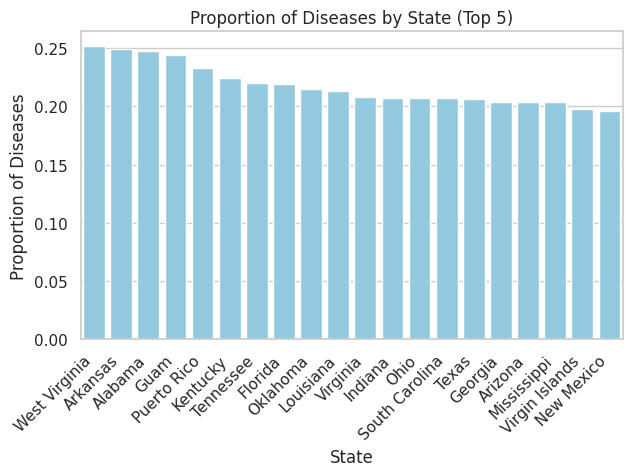

In [119]:
# Find the top 20 states with the highest proportion of diseases

state_disease_proportion
state_total_diseases = state_disease_proportion[['Diabetes','Heart disease','Heart disease & Diabetes']].sum(axis=1)
top_states = state_total_diseases.nlargest(20).index

# Visualize the proportion of diseases for the top 5 states
plt.figure(figsize=(7, 4))
sns.barplot(x=state_total_diseases[top_states].index, y=state_total_diseases[top_states], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Proportion of Diseases')
plt.title('Proportion of Diseases by State (Top 5)')
plt.show()

**General Health and Chronic Disease**

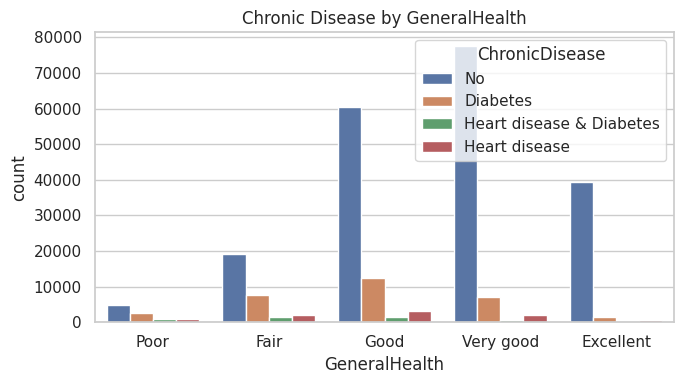

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
# sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(7, 4))

# # Plot 1: AgeCategory vs. ChronicDisease
# sns.countplot(x='AgeCategory', hue='ChronicDisease', data=df1, ax=axes[0])
# axes[0].set_title('Chronic Disease by AgeCategory')

# GeneralHealth vs. ChronicDisease
health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

sns.countplot(x='GeneralHealth', hue='ChronicDisease', data=df1, order=health_order)
plt.title('Chronic Disease by GeneralHealth')
plt.tight_layout()
plt.show()

Obviously poor and fair status in General Health has high proportion of the disease. 

**Age and Chronic Disease**

In [96]:
# Calculate the proportion of 'Yes' for each 'AgeCategory'
proportions = df1.groupby('AgeCategory')['ChronicDisease'].value_counts(normalize=True).unstack().fillna(0)
proportions

ChronicDisease,Diabetes,Heart disease,Heart disease & Diabetes,No
AgeCategory,,,,
Age 18 to 24,0.016994,0.003582,0.000229,0.979195
Age 25 to 29,0.027545,0.003961,0.000270,0.968224
Age 30 to 34,0.041061,0.006069,0.000674,0.952195
Age 35 to 39,0.057961,0.007749,0.002242,0.932048
Age 40 to 44,0.080658,0.010075,0.003358,0.905909
Age 45 to 49,0.104160,0.016057,0.009013,0.870769
Age 50 to 54,0.129269,0.023152,0.012153,0.835426
Age 55 to 59,0.151368,0.031183,0.018853,0.798596
Age 60 to 64,0.157903,0.037389,0.021558,0.783151


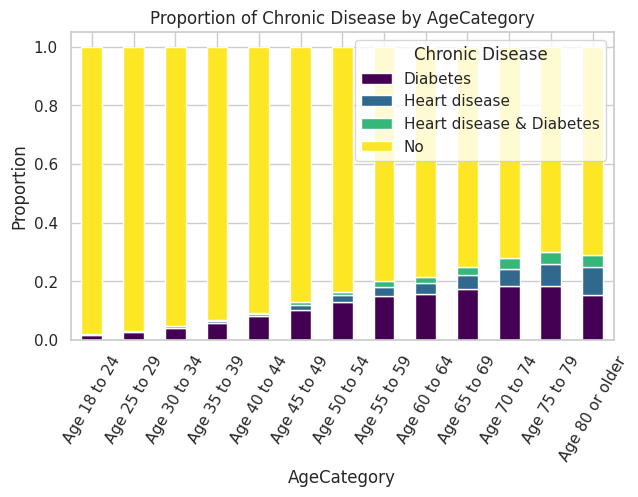

In [103]:
# Calculate the proportion of 'Yes' for each 'AgeCategory'
proportions = df1.groupby('AgeCategory')['ChronicDisease'].value_counts(normalize=True).unstack().fillna(0)

# Plot the stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(7, 4), cmap='viridis')
# sns.barplot(x=proportions.index, y='Yes', data=proportions.reset_index(), hue='ChronicDisease', palette='viridis')

# Set labels and title
plt.xlabel('AgeCategory')
plt.ylabel('Proportion')
plt.title('Proportion of Chronic Disease by AgeCategory')

# Add a legend
plt.legend(title='Chronic Disease', loc='upper right')
plt.xticks(rotation=60)
# Show the plot
plt.show()

Interestingly enough and probably as expected, the proportion of having the diseases are increasing with aging. 
Notably, from age 55 the proportion of people not having any of two chronic diseases become less than 80%.

The Chi-Square statistic measures the difference between the observed and expected frequencies in a contingency table. A larger Chi-Square value indicates a larger difference between the observed and expected values. Diabetes has higher relavance with age than heart disease.

The extremely low P-Value suggests that the observed differences in the distribution of categories are not due to random chance, **providing evidence that age and two chronic disease are significantly associated.**

In [95]:
# Association between 'Age' and the chronic diseases
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df1['AgeCategory'], df1['ChronicDisease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

Chi-Square Value: 16128.303170993437
P-Value: 0.0


#### *Conclusion, Recommendations, Next Steps*
Even though the prediction performance for each disease classes are considerabley lower than the non-disease, it has 80% of accuracy and it can be helpful to check overall health status in terms of the chronic disease. 

- Further Analysis of factors: It can be useful to see how location factor 'State' has a lot of relevance on the chronic disease. If the lifestyle and environment more prone to such the diseases, it will help each states to tackle the issue. 
- cross_val_score: Somehow, in this project cross_val_score did not work as it should be as it has similar or same score as the train data. I had to create validation data manually to check the exact performance. This matter can be dived into to prevent the same issue later on. 


# Step 8. Preparation for app
- Save cleaned dataset(no oversampling, only feature selection)
- Save pickle model here.

In [47]:
X_train_re_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402339 entries, 0 to 402338
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   HadSkinCancer              402339 non-null  object 
 1   PneumoVaxEver              402339 non-null  object 
 2   RemovedTeeth               402339 non-null  object 
 3   CovidPos                   402339 non-null  object 
 4   GeneralHealth              402339 non-null  object 
 5   DifficultyDressingBathing  402339 non-null  object 
 6   AlcoholDrinkers            402339 non-null  object 
 7   HadStroke                  402339 non-null  object 
 8   ECigaretteUsage            402339 non-null  object 
 9   HIVTesting                 402339 non-null  object 
 10  FluVaxLast12               402339 non-null  object 
 11  HadAsthma                  402339 non-null  object 
 12  HadDepressiveDisorder      402339 non-null  object 
 13  TetanusLast10Tdap          40

In [270]:
# Save the cleaned dataset with feature selection
selected_features = list(X_train_refe_b.columns)
selected_features.append('ChronicDisease')
df_cleaned = df1[selected_features]
df_cleaned.to_csv('disease_2022_cleaned.csv', index=False)

In [271]:
df_cleaned.head()

,Sex,HadAngina,State,AgeCategory,HadArthritis,FluVaxLast12,SmokerStatus,PneumoVaxEver,RemovedTeeth,GeneralHealth,ChestScan,AlcoholDrinkers,DifficultyWalking,SleepHours,HeightInMeters,WeightInKilograms,BMI,ChronicDisease
0,Female,No,Alabama,Age 65 to 69,Yes,Yes,Former smoker,Yes,None of them,Very good,No,No,No,9.0,1.60,71.67,27.99,No
1,Male,No,Alabama,Age 70 to 74,Yes,Yes,Former smoker,Yes,None of them,Very good,No,No,No,6.0,1.78,95.25,30.13,Diabetes
2,Male,No,Alabama,Age 75 to 79,Yes,No,Former smoker,Yes,"6 or more, but not all",Very good,Yes,Yes,Yes,8.0,1.85,108.86,31.66,No
3,Female,No,Alabama,Age 80 or older,Yes,Yes,Never smoked,Yes,None of them,Fair,No,No,Yes,9.0,1.70,90.72,31.32,No
4,Female,No,Alabama,Age 80 or older,Yes,Yes,Never smoked,Yes,1 to 5,Good,No,No,No,5.0,1.55,79.38,33.07,No


Must check if selected_features are the same as the features set in Streamlit app.py

In [69]:
# 
selected_features =['PneumoVaxEver', 'HadArthritis',
 'AgeCategory', 'AlcoholDrinkers', 'SmokerStatus', 'GeneralHealth'
 , 'RemovedTeeth', 'State', 'ChestScan', 'HadAngina', 'DifficultyWalking','BMI','SleepHours','WeightInKilograms', 'HeightInMeters', ]
selected_features.append('ChronicDisease')
df_cleaned = df1[selected_features]
df_cleaned.to_csv('disease_2022_cleaned.csv', index=False)

In [63]:
# run before Step 6. Feature Selection and run this
SFM_feature_b = ['PneumoVaxEver', 'HadArthritis','AgeCategory', 'AlcoholDrinkers',
                 'SmokerStatus', 'GeneralHealth', 'RemovedTeeth', 'State', 'ChestScan',
                 'HadAngina', 'DifficultyWalking','BMI','SleepHours','WeightInKilograms', 'HeightInMeters', ]
X_train_refe_b = X_train_re_b[SFM_feature_b]

X_train_B, y_train_B = X_train_refe_b.copy(), y_train_re_b.copy()

# Predict test data
rf_final_b = RandomForestClassifier(random_state=42, n_estimators=14, class_weight = 'balanced', max_depth=12)
rf_final_b.fit(X_train_B, y_train_B)

X_test_final_b = X_test_scaled[SFM_feature_b]
y_test_final_b = y_test.copy()
y_pred_b = rf_final_b.predict(X_test_final_b)

print(classification_report(y_test_final_b, y_pred_b))

              precision    recall  f1-score   support

           0       0.34      0.39      0.36      3109
           1       0.30      0.31      0.30       872
           2       0.30      0.42      0.35       471
           3       0.90      0.86      0.88     20150

    accuracy                           0.78     24602
   macro avg       0.46      0.49      0.47     24602
weighted avg       0.79      0.78      0.78     24602



In [64]:
X_train_refe_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402339 entries, 0 to 402338
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PneumoVaxEver      402339 non-null  object 
 1   HadArthritis       402339 non-null  object 
 2   AgeCategory        402339 non-null  object 
 3   AlcoholDrinkers    402339 non-null  object 
 4   SmokerStatus       402339 non-null  object 
 5   GeneralHealth      402339 non-null  object 
 6   RemovedTeeth       402339 non-null  object 
 7   State              402339 non-null  object 
 8   ChestScan          402339 non-null  object 
 9   HadAngina          402339 non-null  object 
 10  DifficultyWalking  402339 non-null  object 
 11  BMI                402339 non-null  float64
 12  SleepHours         402339 non-null  float64
 13  WeightInKilograms  402339 non-null  float64
 14  HeightInMeters     402339 non-null  float64
dtypes: float64(4), object(11)
memory usage: 46.0+ MB


In [65]:
# Saving the model
import pickle
pickle.dump(rf_final_b, open('rf_model.pkl', 'wb'))

In [127]:
# import joblib

# # Save the model
# joblib.dump(rf_final_b, 'rf_model.joblib')

['rf_model.joblib']

In [70]:
import os

# Check current working directory
print(os.getcwd())

# List files in the current directory
print(os.listdir())

file_path = 'rf_model.pkl'
file_size_bytes = os.path.getsize(file_path)

# Convert bytes to kilobytes (1 KB = 1024 bytes)
file_size_kb = file_size_bytes / 1024.0
# Convert bytes to megabytes (1 MB = 1024 KB)
file_size_mb = file_size_kb / 1024.0
print(f"File Size: {file_size_bytes} bytes / {file_size_kb:.2f} KB / {file_size_mb:.2f} MB")

/kaggle/working
['.virtual_documents', 'directory.zip', 'rf_model.pkl', 'disease_2022_cleaned.csv']
File Size: 7012003 bytes / 6847.66 KB / 6.69 MB


In [71]:
# import os

# file_to_remove = 'cleaned_dataset.csv'  # Replace with the actual file name you want to remove

# # Check if the file exists before attempting to remove it
# if os.path.exists(file_to_remove):
#     os.remove(file_to_remove)
#     print(f"{file_to_remove} removed successfully.")
# else:
#     print(f"{file_to_remove} does not exist.")


In [72]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory = os.curdir, file_name = 'directory.zip'):
    """
    zip all the files in a directory
    
    Parameters
    _____
    directory: str
        directory needs to be zipped, defualt is current working directory
        
    file_name: str
        the name of the zipped file (including .zip), default is 'directory.zip'
        
    Returns
    _____
    Creates a hyperlink, which can be used to download the zip file)
    """
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                pass
            else:
                zip_ref.write(os.path.join(folder, file))

    return FileLink(file_name)

In [73]:
zip_dir()

/kaggle/working/directory.zip

**Kaggle set the version of scikit-learn as 1.2.2 by default everytime rerun the notebook. So it needs to be updated manually and run again from the start**

In [74]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lightgbm, lime, mapclassify, mlxtend, nilearn, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, yellowbrick
Note: you may need to restart the kernel to use updated packages.


In [62]:
# pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/d0/0b/26ad95cf0b747be967b15fb71a06f5ac67aba0fd2f9cd174de6edefc4674/scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.2 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


This project went through numerous iterative process. I had to experiment various oversampling and feature selection method as well as model selection and tuning. On top of it, the first pickle model was too big(more than 1GB. can't upload to Github) that I had to twick the model to minimize the size. Additionally the version of scikit-learn has to be adjusted. 

Note: 
When it occur "ValueError: node array from the pickle has an incompatible dtype" in Streamlit, downgrade the version using pip install scikit-learn==1.2.2 
https://discuss.streamlit.io/t/valueerror-node-array-from-the-pickle-has-an-incompatible-dtype/46682/1
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
